# 分类问题

## 在二维空间，实际上可以等效于拟合最佳直线，将所有点分类

![](./cf001.png)

## 三围空间，就是拟合最佳平面

![](./cf003.png)

## 扩展到n维空间

![](./cf004.png)

# 满足n维空间的各向量维度

W:(1xn),  x:(nx1),  b:(1x1)

# 感知器



把方程式进行编码，形成下图的节点链接方式

![](./cf005.png)

把方程式参数提取出来作为权重，特征向量作为输入节点，方程结果作为输出

把偏置值也作为一个权重(对应特征为固定值1)，最后检查结果是否大于0,如果是，返回1,否则返回0；

提炼出通用公式：

![](./cf007.png)



# 阶跃函数 Setp Function

输入值不小于0,则输出1，否则输出0；

![](./cf008.png)

$$ f(x)=\left\{
\begin{aligned}
1 && x>= 0  \\
0 && x < 0  \\
\end{aligned}
\right.
$$


# 用感知器实现简单逻辑

## AND运算

![](./cf009.png)


In [5]:
%matplotlib inline
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 1.0
weight2 = 1.0
bias = -1.5


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))


Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                  -1.5                    0          Yes
       0          1                  -0.5                    0          Yes
       1          0                  -0.5                    0          Yes
       1          1                   0.5                    1          Yes


##  OR 运算

![](./cf010.png)

## NOT ('非')

In [7]:
%matplotlib inline
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 2.5
weight2 = -4.5
bias = 1.0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                   1.0                    1          Yes
       0          1                  -3.5                    0          Yes
       1          0                   3.5                    1          Yes
       1          1                  -1.0                    0          Yes


## 用感知器实现逻辑运算 - XOR （“异或”）

![](./cf011.png)

A: AND

B: OR

C: NOT

通过简单逻辑的重新组合，可以表达更复杂的逻辑。

感知器是神经网络的最基础单元，

# 如何拟合最佳感知器方程？

先给待拟合参数任意初始值，然后检查所有学习数据

![](./cf012.png)

正确分类的点，不做处理，凡发现错误点，更新参数，**使分类直线更靠近自己**

调整直线，更新参数的方法，类似线性回归中的拟合直线

![](./cf013.png)

# 感知器算法实现

data.type: <class 'numpy.ndarray'> <built-in method reshape of numpy.ndarray object at 0x7fa6afee14e0>


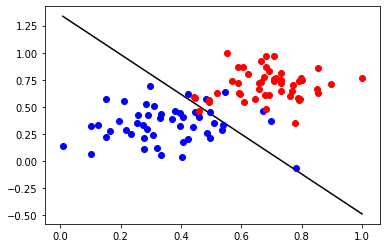

In [63]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

if __name__ == "__main__":
    # perform perceptron 
    data = np.loadtxt('data.csv', delimiter = ',')
    print("data.type:",type(data),data.reshape)
    X = data[:,:-1]
    y = data[:,-1]
    regression_coef = trainPerceptronAlgorithm(X, y)
    
    # plot the results
    import matplotlib.pyplot as plt
    
    plt.figure()
    X_ = data[:,0]
    y_ = data[:,1]
    
    data1 = [x for x in data if x[2] > 0]
    data0 = [x for x in data if x[2] == 0]
    
    X_min = X_.min()
    X_max = X_.max()
    
    data0_ = np.array(data0)
    X0_ = data0_[:,0]
    Y0_ = data0_[:,1]
    data1_ = np.array(data1)
    X1_ = data1_[:,0]
    Y1_ = data1_[:,1]
    
    
    plt.scatter(X1_, Y1_, zorder = 3, c='b')
    plt.scatter(X0_, Y0_, zorder = 3, c='r')
    
    
    counter = len(regression_coef)
    '''
    想画多根直线，直观看分类线移动过程，代码有问题
     for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        #print(color)
        Y_min = X_min * W + b
        Y_max = X_max * W + b
        if Y_min > 1:
            Y_min = 1
            X_min = (1 - b)/W
        if Y_min < 0:
            Y_min = 0
            X_min = (0-b)/W
        if Y_max > 1:
            Y_max = 1
            X_max = (1 - b)/W
        if Y_max < 0:
            Y_max = 0
            X_max = (Y_max - b)/W
        print([X_min, X_max],[Y_min, Y_max])
        #plt.plot([X_min, X_max],[Y_min, Y_max], color = color) #color=[0.5, 0.5, 0.5]
    '''
    W, b = regression_coef[-1]
    
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color) #color=[0.5, 0.5, 0.5]

    
    #plt.show()
    plt.savefig("Perceptron.png")
    
